In [11]:
import pandas as pd
import numpy as np

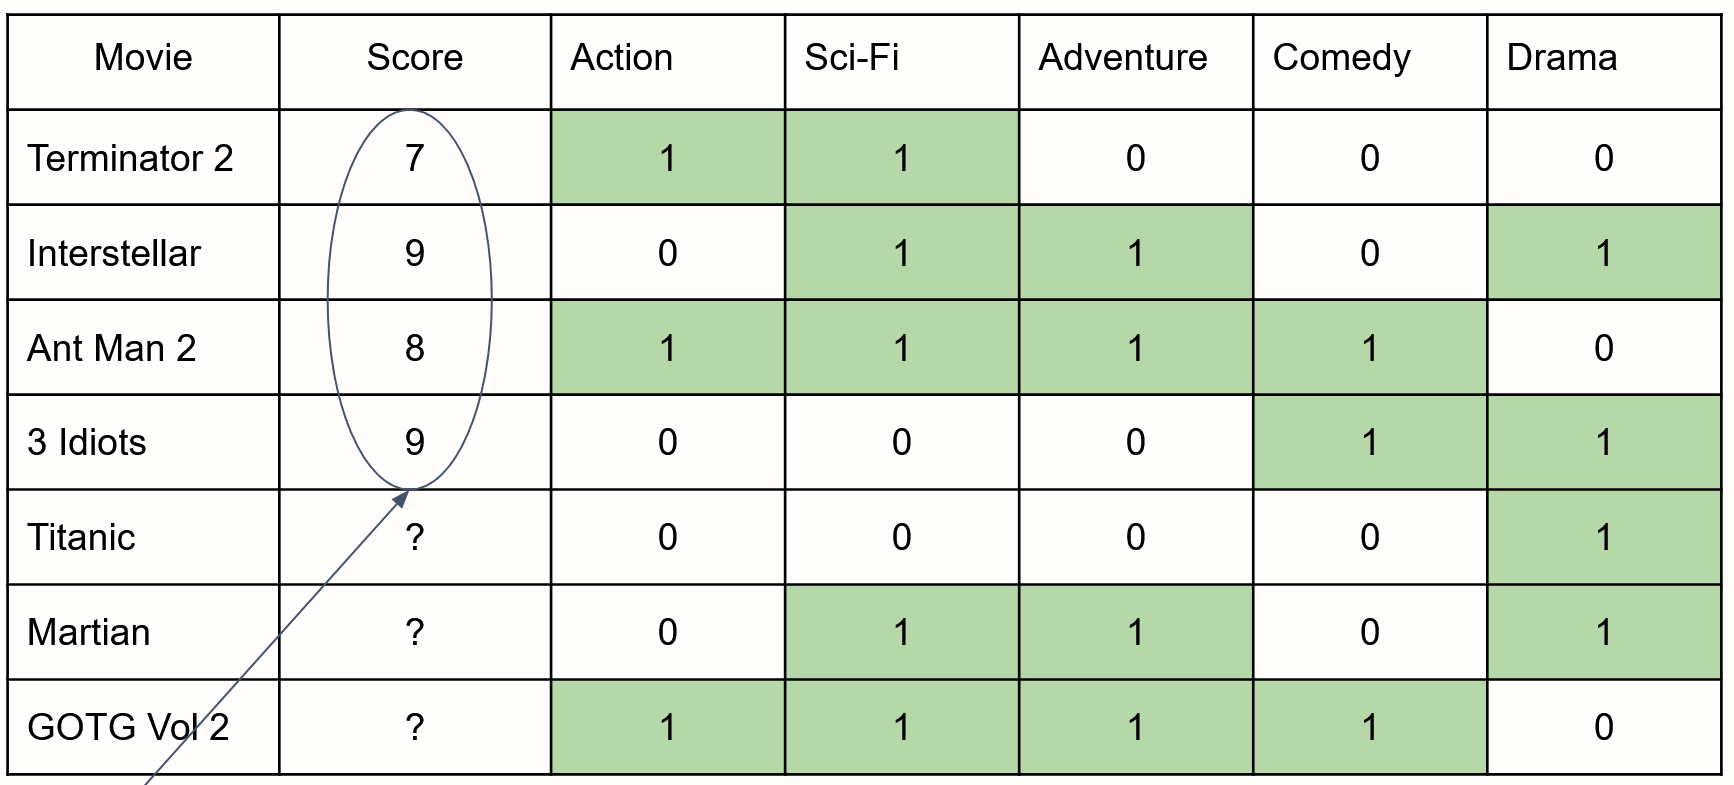

In [12]:
#matriks tags dari film

df = pd.DataFrame(
    data = [
        [1,1,0,0,0],
        [0,1,1,0,1],
        [1,1,1,1,0],
        [0,0,0,1,1],
        [0,0,0,1,1],
        [0,1,1,1,1],
        [1,1,1,1,0]],
    columns=[
        "Action", "Scifi", "Adventure","Comedy", "Drama"],
    index= ["Terminator2", "Interstellar", "AntMan2", "3Idiots", "Titanic", "Martian", "GOTGVol2"]
)
# df.reset_index(inplace=True, drop=False)
# df.rename(columns={"index":"Movie"}, inplace=True)

In [13]:
#scores array

user_scores = [
    [9,8,0,0,0,0,0],
    [0,0,7,6,3,1,1],
    [5,0,1,3,8,0,0]
]

In [26]:
# hitung bobot dan rekomendasi untuk setiap orang
for user in user_scores:
    #copy master data untuk tag setiap film
    df_scoring = df.copy()

    #lakukan perhitungan bobot per genre
    for col in ["Action", "Scifi", "Adventure","Comedy", "Drama"]:
        df_scoring[col] = df_scoring[col]*user
    hasil_scoring = df_scoring.sum()/df_scoring.sum().sum()

    #generate recommendation for each user
    df_recommendation = df.copy()
    for col in df.columns:
        df_recommendation[col] = df_recommendation[col]*hasil_scoring[col]

    #hitung aggregate score for each of the film
    df_recommendation["Aggregate"] =  df_recommendation.sum(axis=1)
    
    #generate recommendation
    #rekomen film dengan skor akhir > 0.8
    df_result = df_recommendation[df_recommendation>0.8]['Aggregate']
    df_result.dropna(inplace=True)

    #rapihkan recommendation result
    recommendation = " ".join(df_result.index.to_list())
    print(f"film direkomendasikan untuk user: {recommendation}")
    
    


film direkomendasikan untuk user: AntMan2 GOTGVol2
film direkomendasikan untuk user: AntMan2 Martian GOTGVol2
film direkomendasikan untuk user: Martian
